# Importing and preprocessing images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from torchvision import transforms, datasets

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((244, 244))
])

# Create an ImageFolder instance aka a dataloader
dataset = datasets.ImageFolder(root='~/APS 360/Data preprocessing/Image data', transform=transform)


In [ ]:
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import torch

batch_size = 128

# Shuffle and split the training set from the rest
np.random.seed(1000)
indices = list(range(len(dataset)))  # Generate indices for the entire dataset
np.random.shuffle(indices)
split_train = int(len(indices) * 0.8)  # 80-20 split
train_indices, test_val_indices = indices[:split_train], indices[split_train:]

# Shuffle and split the rest into testing and validation sets
np.random.shuffle(test_val_indices)
split_test_val = int(len(test_val_indices) * 0.5)  # 50-50 split
test_indices, val_indices = test_val_indices[:split_test_val], test_val_indices[split_test_val:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)
test_sampler = SubsetRandomSampler(test_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler, num_workers=1)
print("len train_loader ", len(train_loader))

val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=val_sampler, num_workers=1)
print("len val_loader ", len(val_loader))

test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=test_sampler, num_workers=1)
print("len test_loader ", len(test_loader))

NameError: name 'dataset' is not defined

In [ ]:
# Continue from your previous code to calculate the standard deviation
channel_sum, channel_squared_sum, num_batches = 0, 0, 0
for data, _ in train_loader:
    channel_sum += torch.mean(data, dim=[0, 2, 3])
    channel_squared_sum += torch.mean(data ** 2, dim=[0, 2, 3])
    num_batches += 1

mean = channel_sum / num_batches
std_dev = (channel_squared_sum / num_batches - mean ** 2) ** 0.5

print(f'Mean per channel: {mean}')
print(f'Standard deviation per channel: {std_dev}')

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Mean per channel: tensor([0.4374, 0.4093, 0.3737])
Standard deviation per channel: tensor([0.2991, 0.2863, 0.2986])


Now that we have the normalization and standard deviation values, we can compute the final train, test and validation set

In [ ]:
from torchvision import transforms, datasets

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((244, 244)),
    transforms.Normalize(mean=[0.4373, 0.4091, 0.3735], std=[0.2990, 0.2863, 0.2986])
])

# Create an ImageFolder instance aka a dataloader
dataset = datasets.ImageFolder(root='/content/drive/My Drive/APS360 Group/Data preprocessing/Image data', transform=transform)


In [ ]:
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import torch

batch_size = 128

# Shuffle and split the training set from the rest
np.random.seed(1000)
indices = list(range(len(dataset)))  # Generate indices for the entire dataset
np.random.shuffle(indices)
split_train = int(len(indices) * 0.8)  # 80-20 split
train_indices, test_val_indices = indices[:split_train], indices[split_train:]

# Shuffle and split the rest into testing and validation sets
np.random.shuffle(test_val_indices)
split_test_val = int(len(test_val_indices) * 0.5)  # 50-50 split
test_indices, val_indices = test_val_indices[:split_test_val], test_val_indices[split_test_val:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)
test_sampler = SubsetRandomSampler(test_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler, num_workers=1)
print("len train_loader ", len(train_loader))

val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=val_sampler, num_workers=1)
print("len val_loader ", len(val_loader))

test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=test_sampler, num_workers=1)
print("len test_loader ", len(test_loader))

len train_loader  91
len val_loader  12
len test_loader  12


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


shape of image  torch.Size([3, 244, 244])


shape of image  torch.Size([3, 244, 244])


shape of image  torch.Size([3, 244, 244])


shape of image  torch.Size([3, 244, 244])


shape of image  torch.Size([3, 244, 244])


shape of image  torch.Size([3, 244, 244])


shape of image  torch.Size([3, 244, 244])


shape of image  torch.Size([3, 244, 244])


shape of image  torch.Size([3, 244, 244])


shape of image  torch.Size([3, 244, 244])


shape of image  torch.Size([3, 244, 244])


shape of image  torch.Size([3, 244, 244])


shape of image  torch.Size([3, 244, 244])


shape of image  torch.Size([3, 244, 244])


shape of image  torch.Size([3, 244, 244])


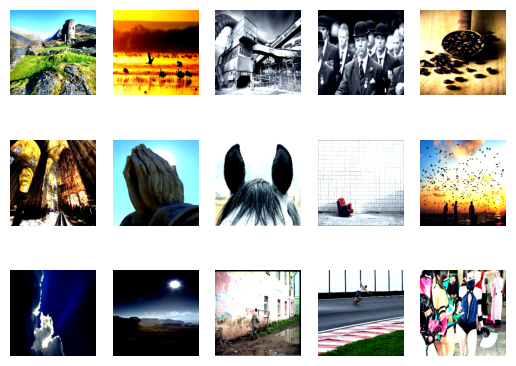

In [ ]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    print("shape of image ", image.shape)
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

# Coding the model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN model
class SentimentCNN(nn.Module):
    def __init__(self):
        super(SentimentCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=3, padding=1)
        self.conv1_bn = nn.BatchNorm2d(4)
        self.conv2 = nn.Conv2d(4, 8, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.2)

        # Calculate the input size for the fully connected layer dynamically
        self.fc_input_size = self._calculate_fc_input_size()
        self.fc1 = nn.Linear(self.fc_input_size, 512)
        self.fc2 = nn.Linear(512, 3)  # 3 output classes: negative, neutral, positive

    def _calculate_fc_input_size(self):
        # Initialize with a dummy tensor to obtain the output shape of the last convolutional layer
        x = torch.randn(1, 3, 244, 244)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        return x.view(-1).shape[0]

    def forward(self, x):
        x = self.pool(F.relu(self.conv1_bn(self.conv1(x))))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, self.fc_input_size)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.dropout(x)
        return x


In [ ]:
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model, criterion, and optimizer
model = SentimentCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop
epochs = 15
train_losses = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:  # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            train_losses.append(running_loss / 10)
            running_loss = 0.0

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)
    print('Validation Accuracy of the network on the validation images: %d %%' % val_accuracy)

print('Finished Training')

# Plot the training curve and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Curve')
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[1,    10] loss: 2.202
[1,    20] loss: 1.096
[1,    30] loss: 1.096
[1,    40] loss: 1.090
[1,    50] loss: 1.086
[1,    60] loss: 1.087
[1,    70] loss: 1.080
[1,    80] loss: 1.065
[1,    90] loss: 1.054


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Validation Accuracy of the network on the validation images: 45 %


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[2,    10] loss: 1.045
[2,    20] loss: 1.045
[2,    30] loss: 1.038
[2,    40] loss: 1.045
[2,    50] loss: 1.023
[2,    60] loss: 1.027
[2,    70] loss: 1.062
[2,    80] loss: 1.021
[2,    90] loss: 1.030


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Validation Accuracy of the network on the validation images: 47 %


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[3,    10] loss: 1.016
[3,    20] loss: 1.008
[3,    30] loss: 1.027
[3,    40] loss: 1.027
[3,    50] loss: 1.017
[3,    60] loss: 0.997
[3,    70] loss: 1.016
[3,    80] loss: 1.033
[3,    90] loss: 1.015


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Validation Accuracy of the network on the validation images: 48 %


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[4,    10] loss: 1.016
[4,    20] loss: 0.987
[4,    30] loss: 1.021
[4,    40] loss: 1.003
[4,    50] loss: 1.018
[4,    60] loss: 0.995
[4,    70] loss: 1.004
[4,    80] loss: 1.002
[4,    90] loss: 0.997


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Validation Accuracy of the network on the validation images: 47 %


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[5,    10] loss: 0.966
[5,    20] loss: 0.965
[5,    30] loss: 0.958
[5,    40] loss: 1.011
[5,    50] loss: 0.986
[5,    60] loss: 0.969
[5,    70] loss: 0.960
[5,    80] loss: 0.974
[5,    90] loss: 0.952


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Validation Accuracy of the network on the validation images: 47 %


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[6,    10] loss: 0.929
[6,    20] loss: 0.929
[6,    30] loss: 0.919
[6,    40] loss: 0.931
[6,    50] loss: 0.924
[6,    60] loss: 0.890
[6,    70] loss: 0.919
[6,    80] loss: 0.894
[6,    90] loss: 0.916


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Validation Accuracy of the network on the validation images: 47 %


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[7,    10] loss: 0.840
[7,    20] loss: 0.805
[7,    30] loss: 0.773
[7,    40] loss: 0.801
